In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Breast Cancer Wisconsin (Diagnostic) dataset
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2]  # Take only the first two features for easier visualization
y = cancer.target

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Data preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Train svm classifier
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [7]:
# Make predictions and evaluate performance
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Confusion Matrix:\n", confusion_matrix_svm)

SVM Accuracy: 0.9035087719298246
SVM Confusion Matrix:
 [[36  7]
 [ 4 67]]


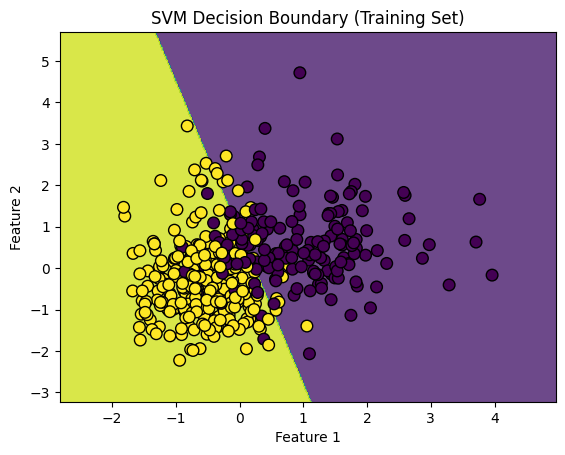

In [8]:
# Visualize the results

def plot_decision_boundary(clf, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=70)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_clf, X_train, y_train, "SVM Decision Boundary (Training Set)")

In [10]:
# Unit test
def test_classifier_accuracy():
    assert accuracy_svm > 0.8, "SVM classifier accuracy too low"
    print("Unit test passed: SVM classifier accuracy is above 0.8")

test_classifier_accuracy()

Unit test passed: SVM classifier accuracy is above 0.8
